In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


In [12]:
#Extracting face from picture
def extract_face(filename,required_size=(224,224)):
    #loading img
    pixels = plt.imread(filename)
    
    #creat detector, using default weights
    detector = MTCNN()
    
    #detecting face
    results = detector.detect_faces(pixels)
    
    #extracting bounding boxes for first face
    x1,y1,width,height = results[0]['box']
    x2,y2=x1+width,y1+height
    
    
    #Extrating face
    
    face = pixels[y1:y2,x1:x2]
    
    # Resizing pixels to model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array =asarray(image)
    return face_array


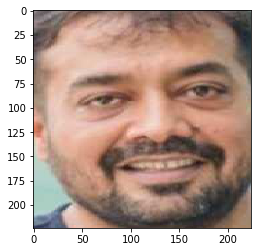

 Anurag_Kashyap': 99.898368%
 Aftab_Shivdasani': 0.016693%
 Mukhriz_Mahathir': 0.011420%
 Jayasurya': 0.007716%
 V._V._Vinayak': 0.007377%


In [21]:
from numpy import expand_dims
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

#load photo to extract face

pixels = extract_face('6.jpg')

plt.imshow(pixels)

plt.show()

pixels=pixels.astype('float32')
samples = expand_dims(pixels,axis=0)

#prepare the face for model
samples=preprocess_input(samples,version=2)

#creat vggface model
model =VGGFace(model='senet50')
#perform prediction
yhat=model.predict(samples)

results=decode_predictions(yhat)


for result in results[0]:
    print('%s: %3f%%'%(result[0][2:],result[1]*100))